# model 2.1

In [26]:
from summer import CompartmentalModel
import matplotlib.pyplot as plt

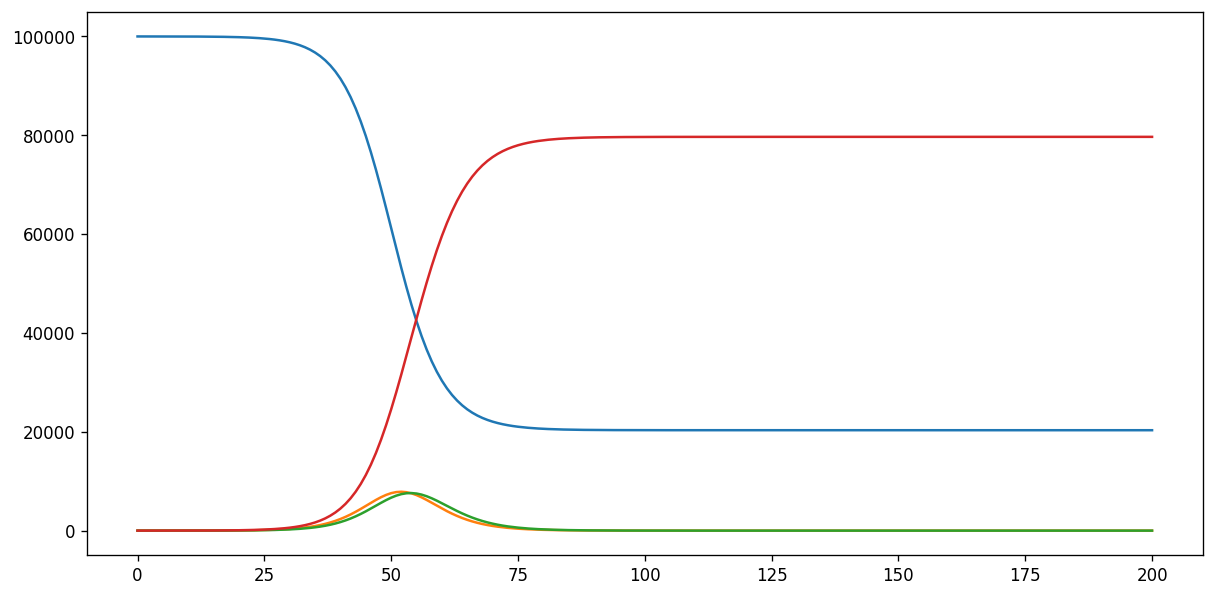

array([[9.99990000e+04, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99981541e+04, 6.58461620e-01, 7.64501872e-01, 4.22975530e-01],
       [9.99973839e+04, 1.00685796e+00, 8.01199298e-01, 8.08086482e-01],
       [9.99965174e+04, 1.29720682e+00, 9.44069196e-01, 1.24133167e+00],
       [9.99954756e+04, 1.61329556e+00, 1.14884684e+00, 1.76223976e+00],
       [9.99942014e+04, 1.98978855e+00, 1.40944808e+00, 2.39939976e+00],
       [9.99926361e+04, 2.44919236e+00, 1.73262255e+00, 3.18208106e+00],
       [9.99907114e+04, 3.01316282e+00, 2.13093148e+00, 4.14452072e+00],
       [9.99883441e+04, 3.70652145e+00, 2.62110374e+00, 5.32829955e+00],
       [9.99854323e+04, 4.55924738e+00, 3.22409727e+00, 6.78440086e+00],
       [9.99818507e+04, 5.60803977e+00, 3.96580026e+00, 8.57548223e+00],
       [9.99774454e+04, 6.89797097e+00, 4.87808056e+00, 1.07785905e+01],
       [9.99720270e+04, 8.48443599e+00, 6.00013095e+00, 1.34884751e+01],
       [9.99653627e+04, 1.04355207e+01, 7.38013780e

In [27]:
# Modifiable parameters in Vynnycky and White textbook
t_step = 1  # Size of time step (days)
total_population = 100000  # Total population size
ave_preinfous = 2  # Average pre-infectious period (days)
ave_infous = 2  # Average duration of infectiousness (days)

# Parameters derived from the above
infous_rate = 1. / ave_preinfous
rec_rate = 1. / ave_infous
beta = 1e-5 * total_population

infectious_seed = 1

model = CompartmentalModel(
    times=[0, 200],
    compartments=["Susceptible", "Pre-infectious", "Infectious", "Immune"],
    infectious_compartments=["Infectious"],
    timestep=t_step,
)

model.set_initial_population(
    distribution={
        "Susceptible": total_population - infectious_seed, 
        "Infectious": infectious_seed
    }
)
model.add_infection_frequency_flow(
    name="infection", contact_rate=1, source="Susceptible", dest="Pre-infectious"
)
model.add_transition_flow(
    name="progression", 
    fractional_rate=infous_rate,
    source="Pre-infectious", 
    dest="Infectious"
)
model.add_transition_flow(
    name="recovery", 
    fractional_rate=rec_rate, 
    source="Infectious", 
    dest="Immune"
)

model.run()

fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
for compartment_idx in range(model.outputs.shape[1]):
    ax.plot(model.times, model.outputs.T[compartment_idx])
plt.show()